In [1]:
# Loading the necessary libraries in Python

import pandas as pd
import numpy as np
import sklearn
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# Loading the Train data
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_2689622d3bb44c6295e7bc1d0783dde4(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_27f432c403a506fc9b89694a383d87f4282a96de','domain': {'id': 'ce9588cdb66f4bc8889c950585780ce9'},
            'password': 'l^R6K]-EMg&56c[/'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_train = pd.read_csv(get_object_storage_file_with_credentials_2689622d3bb44c6295e7bc1d0783dde4('DefaultProjectnchellaminibmcom', 'train.csv'))
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Describing the train data
df_train.describe(include ="all")
# Age,Cabin and Embarked has missing values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
# Finding Shape of data
df_train.shape

(891, 12)

In [5]:
# Finding the info on data
df_train.info()

# Float 2,int 5,object 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:

# Finding the missing values in each data item
df_train.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#finding count of values in each variable
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb7e8f85f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ffb769c0940>]], dtype=object)

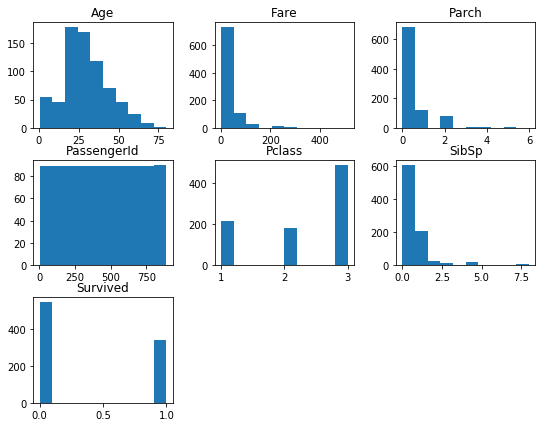

In [9]:
# creating a histogram to see the spread of data across int and float type variables
df_train.hist(bins=10,figsize=(9,7),grid=False)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


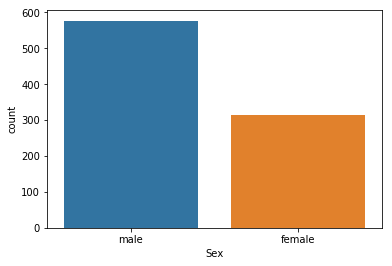

In [10]:
# creating Count charts to see the count of values against various categorical varaiables
# There are more Male Passengers than the Female Passengers
sns.countplot(x='Sex',data=df_train)

In [11]:
# getting the count of values for the category variables
# it looks like we have 64.7 % male passengers and 35% Female Passengers
df_train.Sex.value_counts()
df_train.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


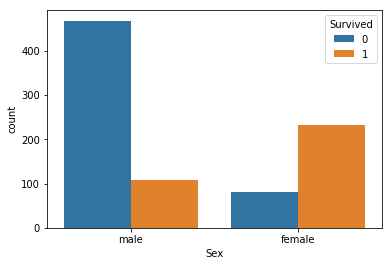

In [12]:
# Creating a countplot with the Sex and Survived counts values.
sns.countplot(x='Sex',hue='Survived',data=df_train)

In [13]:
# To get the unique values in each variable use the Unique Function
df_train['Sex'].unique()
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
# Grouping the Sex and Survived values and creating a pivot table to view the results

gp1=df_train[['Sex','Survived','PassengerId']]
gp1_value=gp1.groupby(['Sex','Survived'],as_index=False).count()
pv=gp1_value.pivot(index='Sex',columns='Survived')
pv


PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

In [15]:
# Grouping the Embarked and Survived values and creating a pivot
gp2=df_train[['Embarked','Survived','PassengerId']]
gp2_value=gp2.groupby(['Embarked','Survived'],as_index=False
                     ).count()
gp2_value
piv2=gp2_value.pivot(index='Embarked',columns='Survived')
piv2

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

In [16]:
#creating a function to convert values to % and creating a crosstab between Embarked and Pclass
def perconverter(x):
    return x/float(x[-1])
#pd.crosstab(df_train['Embarked'],df_train['Pclass'],margins=True).apply(perconverter)
pd.crosstab(df_train['Embarked'],df_train['Survived'],margins=True).apply(perconverter,axis=1)

Survived,0,1,All
Embarked,,,
C,0.446429,0.553571,1.0
Q,0.610390,0.389610,1.0
S,0.663043,0.336957,1.0
All,0.617548,0.382452,1.0


In [17]:
#crosstab with Pclass and Embarked
pd.crosstab(df_train['Pclass'],df_train['Embarked'],margins=True)

Embarked,C,Q,S,All
Pclass,,,,
1,85,2,127,214
2,17,3,164,184
3,66,72,353,491
All,168,77,644,889


In [18]:
# Crosstab with Parch and Survived
pd.crosstab(df_train['Parch'],df_train['Survived'],margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [19]:
#Creating a pivot table using only one column. When we use only one column in pivot table , by default all the other numerical columns wll be added in rows and a pivot table will be created.
piv2=df_train.pivot_table(columns='Survived')
piv2

Survived,0,1
Age,30.626179,28.343690
Fare,22.117887,48.395408
Parch,0.329690,0.464912
PassengerId,447.016393,444.368421
Pclass,2.531876,1.950292
SibSp,0.553734,0.473684


In [20]:
# Creating a pivot table with 3 variables in rows and one variable in column
piv3=df_train.pivot_table(index=["Embarked","Pclass","Sex"],values="Survived",aggfunc=np.sum)
piv3

Survived
Embarked Pclass Sex             
C        1      female        42
                male          17
         2      female         7
                male           2
         3      female        15
                male          10
Q        1      female         1
                male           0
         2      female         2
                male           0
         3      female        24
                male           3
S        1      female        46
                male          28
         2      female        61
                male          15
         3      female        33
                male          34

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


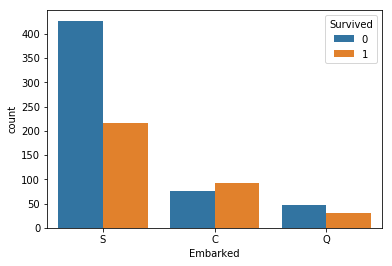

In [21]:
#Countplot to get the number of people travelled & survived by embarked location
sns.countplot(x='Embarked',hue='Survived',data=df_train)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


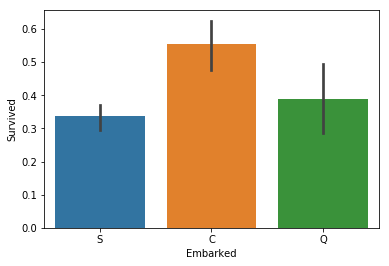

In [22]:
# Barplot to get the Survival % by embarked location

sns.barplot(x='Embarked',y='Survived',data=df_train)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


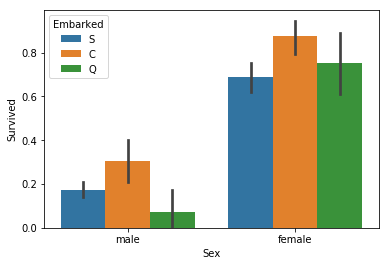

In [23]:
# Since we know Females survived more in Titanic Tragedy , we are greating varios viz to determine if 
#there are any significane on the survival rate with other variables
sns.barplot(x='Sex',y='Survived',hue='Embarked',data=df_train)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


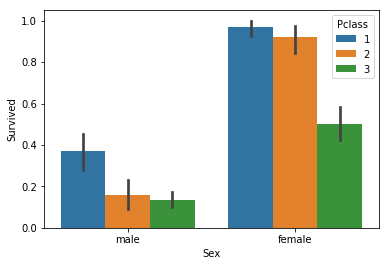

In [24]:
#barplots with Sex and Survived by Pclass
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=df_train)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


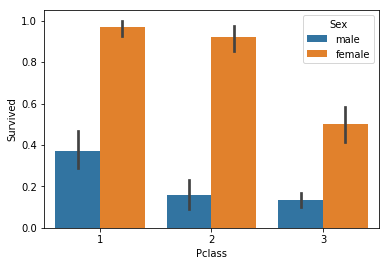

In [25]:
# Barplot with Pclass as X-axis and Sex as Hue
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=df_train)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


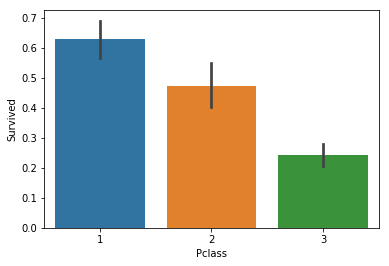

In [26]:
# Survival plot by Pclass
sns.barplot(x='Pclass',y='Survived',data=df_train)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


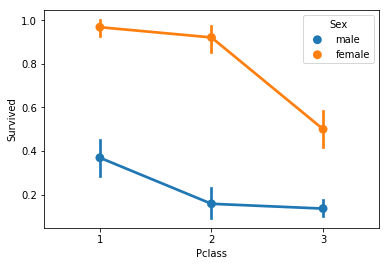

In [27]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=df_train)
#From this plot we could see that females have survived more in all the three passenger classes

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


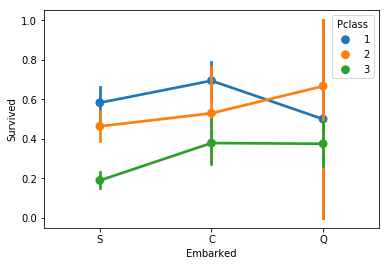

In [28]:
sns.pointplot(x='Embarked',y='Survived',hue='Pclass',data=df_train)

In [29]:
pd.crosstab(df_train['Embarked'],[df_train['Pclass'],df_train['Survived']],margins=True,dropna=False)

Pclass     1        2        3       All
Survived   0    1   0   1    0    1     
Embarked                                
C         26   59   8   9   41   25  168
Q          1    1   1   2   45   27   77
S         53   74  88  76  286   67  644
All       80  136  97  87  372  119  891

In [30]:
pd.crosstab(df_train['Embarked'],[df_train['Survived'],df_train['Pclass']],margins=True,dropna=False)

Survived   0             1           All
Pclass     1   2    3    1   2    3     
Embarked                                
C         26   8   41   59   9   25  168
Q          1   1   45    1   2   27   77
S         53  88  286   74  76   67  644
All       80  97  372  136  87  119  891

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


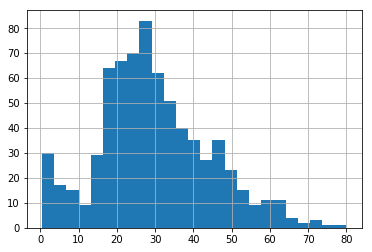

In [32]:
df_train['Age'].hist(bins=25)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


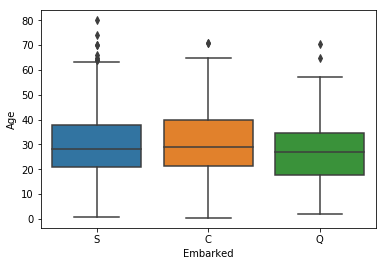

In [33]:
sns.boxplot(x='Embarked',y='Age',data=df_train)

In [34]:
pd.crosstab(df_train['Embarked'],[df_train['Parch'],df_train['Survived']],margins=True)

Parch       0        1       2      3     4  5     6  All
Survived    0    1   0   1   0   1  0  1  0  0  1  0     
Embarked                                                 
C          60   63  11  19   4  10  0  1  0  0  0  0  168
Q          39   30   6   0   1   0  0  0  0  1  0  0   77
S         346  138  36  46  35  30  2  2  4  3  1  1  644
All       445  231  53  65  40  40  2  3  4  4  1  1  889

In [35]:
test=df_train['Survived'].replace(0,'Not Survived',inplace=True)
print(test)

None


In [36]:
df_train['Survived'].replace('Not Survived',0,inplace=True)

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
Surv=df_train['Survived']
Surv=Surv.replace([0,1],['Not Survived','Survived'])
Surv.head(5)

0    Not Survived
1        Survived
2        Survived
3        Survived
4    Not Survived
Name: Survived, dtype: object

In [39]:
pd.crosstab(df_train['Survived'],df_train['Age'],margins=True)

Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,...,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0,All
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,0,2,3,1,2,1,2,1,0,424
1,1,1,2,2,1,5,3,5,7,4,...,2,0,0,0,0,0,0,0,1,290
All,1,1,2,2,1,7,10,6,10,4,...,2,2,3,1,2,1,2,1,1,714


In [40]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:

# Using Corr to get the correlation between all numerical columns
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [42]:
pd.crosstab(df_train['Survived'],df_train['Cabin'],margins=True)

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,All
Survived,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,1,0,0,1,...,0,1,2,1,0,1,0,2,1,68
1,0,0,1,0,1,1,0,1,1,0,...,1,0,0,2,3,0,2,2,0,136
All,1,1,1,1,1,1,1,1,1,1,...,1,1,2,3,3,1,2,4,1,204


In [43]:
pd.crosstab(df_train['Survived'],df_train['Fare'],margins=True)

Fare,0.0,4.0125,5.0,6.2375,6.4375,6.45,6.4958,6.75,6.8583,6.95,...,164.8667,211.3375,211.5,221.7792,227.525,247.5208,262.375,263.0,512.3292,All
Survived,,,,,,,,,,,,,,,,,,,,,
0,14,1,1,1,1,1,2,2,1,1,...,0,0,1,1,1,1,0,2,0,549
1,1,0,0,0,0,0,0,0,0,0,...,2,3,0,0,3,1,2,2,3,342
All,15,1,1,1,1,1,2,2,1,1,...,2,3,1,1,4,2,2,4,3,891


In [44]:
#Using the cut will split the data based on the minimum and maximum values
test=pd.cut(df_train['Fare'],3)
test.unique()

[(-0.512, 170.776], (170.776, 341.553], (341.553, 512.329]]
Categories (3, interval[float64]): [(-0.512, 170.776] < (170.776, 341.553] < (341.553, 512.329]]

In [45]:
#Using the QCUT will be splitting the data samples based on the quantile function so the data will be split in equal number of values
test1=pd.qcut(df_train['Fare'],3)
test1.unique()

[(-0.001, 8.662], (26.0, 512.329], (8.662, 26.0]]
Categories (3, interval[float64]): [(-0.001, 8.662] < (8.662, 26.0] < (26.0, 512.329]]

In [46]:
test3=pd.qcut(df_train['Age'],3)
test3.unique()

[(0.419, 23.0], (34.0, 80.0], (23.0, 34.0], NaN]
Categories (3, interval[float64]): [(0.419, 23.0] < (23.0, 34.0] < (34.0, 80.0]]

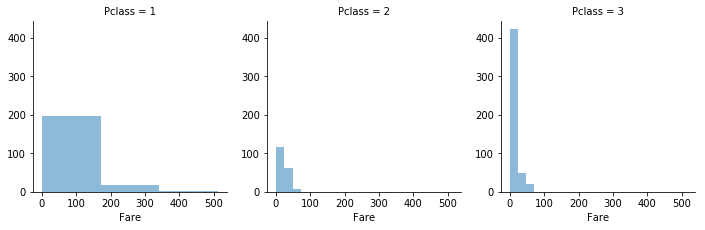

In [47]:
a=sns.FacetGrid(df_train,col='Pclass',size=3.3)
a.map(plt.hist,'Fare',alpha=.5,bins=3)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


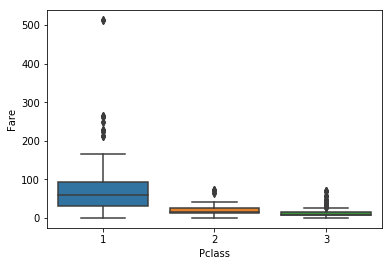

In [48]:
sns.boxplot(x='Pclass',y='Fare',data=df_train)

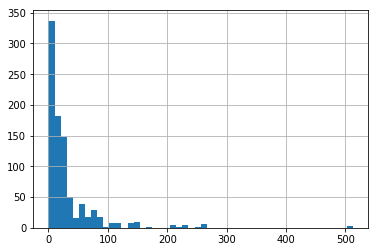

In [49]:
df_train['Fare'].hist(bins=50)

In [50]:
#Using qcut to bin the values in Fare1 field with Low ,Medium and High
df_train['Fare1']=pd.qcut(df_train['Fare'],3,labels=['Low','Medium','High'])

In [51]:

df_test = pd.read_csv(get_object_storage_file_with_credentials_2689622d3bb44c6295e7bc1d0783dde4('DefaultProjectnchellaminibmcom', 'test.csv'))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
df_test['Fare1']=pd.cut(df_test['Fare'],3,labels=['Low','Medium','High'])

In [53]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Low
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Low
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Low
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Low
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Low


In [54]:
df_test.Sex=df_test.Sex.map({'male':1,'female':2}).head()

In [55]:
#mapping the values in Fare1 column with numerical values
df_train['Fare1']=df_train['Fare1'].map({'Low':1,'Medium':2,'High':3})

In [56]:
df_test.Fare1=df_test.Fare1.map({'Low':1,'Medium':2,'High':3}).head()

In [57]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare1
0,892,3,"Kelly, Mr. James",1.0,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2.0,47.0,1,0,363272,7.0000,NaN,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",1.0,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2.0,22.0,1,1,3101298,12.2875,NaN,S,1.0


In [58]:
df_test.drop('Fare',axis=1,inplace=True)

In [59]:
#filling the null values in Age as -0.5 and creating user defined bins and labels
df_train['Age1']=df_train['Age'].fillna(-0.5)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['unknown','baby','Toddler','Teen','Student','Young Adult','Adult','Senior']


In [60]:
df_test['Age1']=df_test['Age'].fillna(-0.5)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['unknown','baby','Toddler','Teen','Student','Young Adult','Adult','Senior']

In [61]:
df_test['Age1']=pd.cut(df_test['Age1'],bins,labels=labels)

In [62]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Fare1,Age1
0,892,3,"Kelly, Mr. James",1.0,34.5,0,0,330911,NaN,Q,1.0,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2.0,47.0,1,0,363272,NaN,S,1.0,Adult
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.0,0,0,240276,NaN,Q,1.0,Senior
3,895,3,"Wirz, Mr. Albert",1.0,27.0,0,0,315154,NaN,S,1.0,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2.0,22.0,1,1,3101298,NaN,S,1.0,Student


In [63]:
df_train['Age1']=pd.cut(df_train['Age1'],bins,labels=labels)

In [64]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare1,Age1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Young Adult


/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


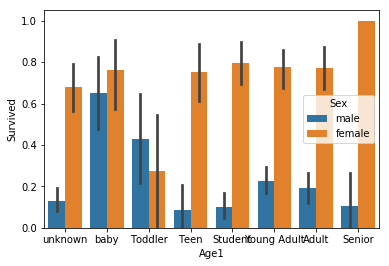

In [65]:
sns.barplot(x='Age1',y='Survived',hue='Sex',data=df_train)

In [66]:
#dropping the Ticket column as we have created fare1 column based on it
df_train.drop(['Ticket'],axis=1).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare1,Age1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,3,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,1,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,Young Adult


In [67]:
df_train['Sex']=df_train['Sex'].map({'male':1,'female':2})

In [68]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare1,Age1
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,3,Adult
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,Young Adult


In [69]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [70]:
#replacing the values in Embarked using the map function
df_train['Embarked']=df_train['Embarked'].map({'S':1,'C':2,'Q':3})


In [71]:
df_test['Embarked']=df_test['Embarked'].map({'S':1,'C':2,'Q':3})

In [72]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Fare1,Age1
0,892,3,"Kelly, Mr. James",1.0,34.5,0,0,330911,NaN,3,1.0,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2.0,47.0,1,0,363272,NaN,1,1.0,Adult
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.0,0,0,240276,NaN,3,1.0,Senior
3,895,3,"Wirz, Mr. Albert",1.0,27.0,0,0,315154,NaN,1,1.0,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2.0,22.0,1,1,3101298,NaN,1,1.0,Student


In [73]:
df_test.drop('Embarked',axis=1,inplace=True)

In [74]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare1,Age1
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2.0,3,Adult
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,1,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1.0,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0,1,Young Adult


In [75]:
#finding the mode values for the Embarked column
m1=df_train.Embarked.mode().values[0]
m1


1.0

In [76]:
#filling the null values with mode
df_train['Embarked']=df_train['Embarked'].fillna(m1)


In [77]:
df_train.Embarked.isnull().sum()

0

In [78]:
#extracting a sequence of characters from a variable using Extract function
df_train['Title']=df_train.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare1,Age1,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2.0,3,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,1,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1.0,3,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0,1,Young Adult,Mr


In [79]:
df_train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Lady          1
Countess      1
Jonkheer      1
Sir           1
Capt          1
Ms            1
Name: Title, dtype: int64

In [80]:
#replacing multiple vales in a column with other values
df_train.Title=df_train.Title.replace(['Don','Sir','Col','Capt','Jonkheer','Major','Rev','Dr','Countess'],'Rare')
df_train.Title=df_train.Title.replace(['Ms','Mme','Lady','Mlle'],'Miss')
df_train.Title.value_counts()

Mr        517
Miss      187
Mrs       125
Master     40
Rare       22
Name: Title, dtype: int64

In [81]:
df_train[df_train['Title']=='Mrs']['Age'].mode().values[0]

24.0

In [82]:
pd.crosstab(df_train['Age1'],df_train['Title'])

Title,Master,Miss,Mr,Mrs,Rare
Age1,,,,,
unknown,4,36,119,17,1
baby,23,21,0,0,0
Toddler,13,11,1,0,0
Teen,0,29,34,7,0
Student,0,36,88,13,1
Young Adult,0,33,146,37,4
Adult,0,20,111,49,15
Senior,0,1,18,2,1


In [83]:
df_train['Cabin'].value_counts(dropna=False).unique()

array([687,   4,   3,   2,   1])

In [84]:
df_train[df_train['Title']=='Mrs']['Age'].isnull().sum()

17

In [85]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare1,Age1,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2.0,3,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,1,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1.0,3,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0,1,Young Adult,Mr


In [86]:
df_train.drop('Fare',axis=1,inplace=True)

In [87]:
df_train.drop('Name',axis=1,inplace=True)

In [88]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Fare1,Age1,Title
0,1,0,3,1,22.0,1,0,A/5 21171,NaN,1.0,1,Student,Mr
1,2,1,1,2,38.0,1,0,PC 17599,C85,2.0,3,Adult,Mrs
2,3,1,3,2,26.0,0,0,STON/O2. 3101282,NaN,1.0,1,Young Adult,Miss
3,4,1,1,2,35.0,1,0,113803,C123,1.0,3,Young Adult,Mrs
4,5,0,3,1,35.0,0,0,373450,NaN,1.0,1,Young Adult,Mr


In [89]:
df_train.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [90]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare1,Age1,Title
0,1,0,3,1,22.0,1,0,1.0,1,Student,Mr
1,2,1,1,2,38.0,1,0,2.0,3,Adult,Mrs
2,3,1,3,2,26.0,0,0,1.0,1,Young Adult,Miss
3,4,1,1,2,35.0,1,0,1.0,3,Young Adult,Mrs
4,5,0,3,1,35.0,0,0,1.0,1,Young Adult,Mr


In [91]:
#replacing the column names using the rename function
df_train.rename(columns={'Fare1':'Fare'},inplace=True)

In [92]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare,Age1,Title
0,1,0,3,1,22.0,1,0,1.0,1,Student,Mr
1,2,1,1,2,38.0,1,0,2.0,3,Adult,Mrs
2,3,1,3,2,26.0,0,0,1.0,1,Young Adult,Miss
3,4,1,1,2,35.0,1,0,1.0,3,Young Adult,Mrs
4,5,0,3,1,35.0,0,0,1.0,1,Young Adult,Mr


In [93]:
df_train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [94]:
df_train.pivot_table(index='Title')

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
Title,,,,,,,,,
Master,4.574167,1.325000,2.550000,1.375000,414.975000,2.625000,1.000000,2.300000,0.575000
Miss,22.033113,1.577540,2.112299,0.534759,412.518717,2.278075,2.000000,0.700535,0.705882
Mr,32.368090,1.299807,1.762089,0.152805,454.499033,2.410058,1.000000,0.288201,0.156673
Mrs,35.898148,1.296000,2.440000,0.832000,453.160000,2.000000,2.000000,0.696000,0.792000
Rare,45.428571,1.409091,2.545455,0.090909,546.590909,1.363636,1.090909,0.318182,0.318182


In [95]:
df_train.loc[(df_train.Age.isnull())&(df_train.Title=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Title=='Mr'),'Age']=32
df_train.loc[(df_train.Age.isnull())&(df_train.Title=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Title=='Master'),'Age']=4
df_train.loc[(df_train.Age.isnull())&(df_train.Title=='Rare'),'Age']=45


In [96]:
df_test['Title']=df_test.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare1,Age1,Title
0,892,3,"Kelly, Mr. James",1.0,34.5,0,0,330911,NaN,1.0,Young Adult,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2.0,47.0,1,0,363272,NaN,1.0,Adult,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.0,0,0,240276,NaN,1.0,Senior,Mr
3,895,3,"Wirz, Mr. Albert",1.0,27.0,0,0,315154,NaN,1.0,Young Adult,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2.0,22.0,1,1,3101298,NaN,1.0,Student,Mrs


In [97]:
df_test.Title=df_test.Title.replace(['Don','Sir','Col','Capt','Jonkheer','Major','Rev','Dr','Countess'],'Rare')
df_test.Title=df_test.Title.replace(['Ms','Mme','Lady','Mlle'],'Miss')
df_test.Title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        5
Dona        1
Name: Title, dtype: int64

In [98]:
df_test.loc[(df_test.Age.isnull())&(df_test.Title=='Mrs'),'Age']=36
df_test.loc[(df_test.Age.isnull())&(df_test.Title=='Mr'),'Age']=32
df_test.loc[(df_test.Age.isnull())&(df_test.Title=='Miss'),'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Title=='Master'),'Age']=4
df_test.loc[(df_test.Age.isnull())&(df_test.Title=='Rare'),'Age']=45

In [99]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Fare           0
Age1           0
Title          0
dtype: int64

In [100]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex            413
Age              0
SibSp            0
Parch            0
Ticket           0
Cabin          327
Fare1          413
Age1             0
Title            0
dtype: int64

In [101]:
pd.crosstab(df_train['Age1'],df_train['Title'])

Title,Master,Miss,Mr,Mrs,Rare
Age1,,,,,
unknown,4,36,119,17,1
baby,23,21,0,0,0
Toddler,13,11,1,0,0
Teen,0,29,34,7,0
Student,0,36,88,13,1
Young Adult,0,33,146,37,4
Adult,0,20,111,49,15
Senior,0,1,18,2,1


In [102]:
df_train['Age1']=df_train['Age'].fillna(-0.5)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['unknown','baby','Toddler','Teen','Student','Young Adult','Adult','Senior']
df_train['Age1']=pd.cut(df_train['Age1'],bins,labels=labels)

In [103]:
pd.crosstab(df_train['Age1'],df_train['Title'])

Title,Master,Miss,Mr,Mrs,Rare
Age1,,,,,
unknown,0,0,0,0,0
baby,27,21,0,0,0
Toddler,13,11,1,0,0
Teen,0,29,34,7,0
Student,0,72,88,13,1
Young Adult,0,33,265,37,4
Adult,0,20,111,66,16
Senior,0,1,18,2,1


In [104]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare,Age1,Title
0,1,0,3,1,22.0,1,0,1.0,1,Student,Mr
1,2,1,1,2,38.0,1,0,2.0,3,Adult,Mrs
2,3,1,3,2,26.0,0,0,1.0,1,Young Adult,Miss
3,4,1,1,2,35.0,1,0,1.0,3,Young Adult,Mrs
4,5,0,3,1,35.0,0,0,1.0,1,Young Adult,Mr


In [105]:
df_train.drop(['PassengerId'],axis=1,inplace=True)

In [106]:
df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare,Age1,Title
0,0,3,1,22.0,1,0,1.0,1,Student,Mr
1,1,1,2,38.0,1,0,2.0,3,Adult,Mrs
2,1,3,2,26.0,0,0,1.0,1,Young Adult,Miss
3,1,1,2,35.0,1,0,1.0,3,Young Adult,Mrs
4,0,3,1,35.0,0,0,1.0,1,Young Adult,Mr


In [107]:
df_train.Age1.value_counts()

Young Adult    339
Adult          213
Student        174
Teen            70
baby            48
Toddler         25
Senior          22
unknown          0
Name: Age1, dtype: int64

In [108]:
df_train.Age1.replace({'baby':1,'Toddler':2,'Student':3,'Teen':4,'Young Adult':5,'Adult':6,'Senior':7},inplace=True)

In [109]:
df_train.Age1.value_counts()

5    339
6    213
3    174
4     70
1     48
2     25
7     22
Name: Age1, dtype: int64

In [110]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare,Age1,Title
0,0,3,1,22.0,1,0,1.0,1,3,Mr
1,1,1,2,38.0,1,0,2.0,3,6,Mrs


In [111]:
df_train.drop('Age',axis=1,inplace=True)

In [112]:
df_train.rename(columns={'Age1':'Age'},inplace=True)

In [113]:
df_train['Family']=df_train['SibSp']+df_train['Parch']

In [114]:
df_train.Family

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Family, Length: 891, dtype: int64

In [115]:
df_train.loc[(df_train.Family==0),'Family']=0
df_train.loc[(df_train.Family>0),'Family']=1

In [116]:
df_train.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Fare,Age,Title,Family
0,0,3,1,1,0,1.0,1,3,Mr,1
1,1,1,2,1,0,2.0,3,6,Mrs,1
2,1,3,2,0,0,1.0,1,5,Miss,0
3,1,1,2,1,0,1.0,3,5,Mrs,1
4,0,3,1,0,0,1.0,1,5,Mr,0
5,0,3,1,0,0,3.0,1,5,Mr,0
6,0,1,1,0,0,1.0,3,6,Mr,0
7,0,3,1,3,1,1.0,2,1,Master,1
8,1,3,2,0,2,1.0,2,5,Mrs,1
9,1,2,2,1,0,2.0,3,4,Mrs,1


In [117]:
df_train.drop(['SibSp','Parch','Title'],axis=1,inplace=True)

In [118]:
df_test['Family']=df_test['SibSp']+df_test['Parch']

In [119]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare1,Age1,Title,Family
0,892,3,"Kelly, Mr. James",1.0,34.5,0,0,330911,NaN,1.0,Young Adult,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2.0,47.0,1,0,363272,NaN,1.0,Adult,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.0,0,0,240276,NaN,1.0,Senior,Mr,0
3,895,3,"Wirz, Mr. Albert",1.0,27.0,0,0,315154,NaN,1.0,Young Adult,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2.0,22.0,1,1,3101298,NaN,1.0,Student,Mrs,2


In [120]:
df_test.drop(['Ticket','Cabin','SibSp','Parch'],axis=1,inplace=True)

In [121]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,Fare1,Age1,Title,Family
0,892,3,"Kelly, Mr. James",1.0,34.5,1.0,Young Adult,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2.0,47.0,1.0,Adult,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",1.0,62.0,1.0,Senior,Mr,0
3,895,3,"Wirz, Mr. Albert",1.0,27.0,1.0,Young Adult,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2.0,22.0,1.0,Student,Mrs,2


In [122]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex            413
Age              0
Fare1          413
Age1             0
Title            0
Family           0
dtype: int64

In [130]:
df_test.Fare=df_test.Fare.fillna(df_test.Fare.mean())

In [131]:
df_test['Fare1']=df_test.Fare1.fillna('Low')

In [ ]:
df_test.head(20)

In [132]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex            413
Age              0
Fare1            0
Age1             0
Title            0
Family           0
Sex              0
Fare             0
dtype: int64

In [135]:
df_test.drop(['Fare1','Sex'],axis=1,inplace=True)

In [136]:
df_test.head(10)

,PassengerId,Pclass,Name,Age,Age1,Title,Family,Fare
0,892,3,"Kelly, Mr. James",34.5,Young Adult,Mr,0,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,Adult,Mrs,1,7.0000
2,894,2,"Myles, Mr. Thomas Francis",62.0,Senior,Mr,0,9.6875
3,895,3,"Wirz, Mr. Albert",27.0,Young Adult,Mr,0,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,Student,Mrs,2,12.2875
5,897,3,"Svensson, Mr. Johan Cervin",14.0,Teen,Mr,0,9.2250
6,898,3,"Connolly, Miss. Kate",30.0,Young Adult,Miss,0,7.6292
7,899,2,"Caldwell, Mr. Albert Francis",26.0,Young Adult,Mr,2,29.0000
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,Teen,Mrs,0,7.2292
9,901,3,"Davies, Mr. John Samuel",21.0,Student,Mr,2,24.1500


In [124]:

df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_2689622d3bb44c6295e7bc1d0783dde4('DefaultProjectnchellaminibmcom', 'test.csv'))
df_data_1.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
Sex=df_data_1['Sex']
Fare=df_data_1['Fare']

In [140]:
df_test=pd.concat([df_test,Sex],axis=1)

In [141]:
df_test.head()

,PassengerId,Pclass,Name,Age,Age1,Title,Family,Fare,Sex
0,892,3,"Kelly, Mr. James",34.5,Young Adult,Mr,0,7.8292,male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,Adult,Mrs,1,7.0000,female
2,894,2,"Myles, Mr. Thomas Francis",62.0,Senior,Mr,0,9.6875,male
3,895,3,"Wirz, Mr. Albert",27.0,Young Adult,Mr,0,8.6625,male
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,Student,Mrs,2,12.2875,female


In [128]:
df_test=pd.concat([df_test,Fare],axis=1)

In [138]:
df_test.head()

,PassengerId,Pclass,Name,Age,Age1,Title,Family,Fare
0,892,3,"Kelly, Mr. James",34.5,Young Adult,Mr,0,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,Adult,Mrs,1,7.0000
2,894,2,"Myles, Mr. Thomas Francis",62.0,Senior,Mr,0,9.6875
3,895,3,"Wirz, Mr. Albert",27.0,Young Adult,Mr,0,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,Student,Mrs,2,12.2875


In [142]:
df_test['Sex']=df_test.Sex.map({'male':1,'female':2})

In [143]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Age            0
Age1           0
Title          0
Family         0
Fare           0
Sex            0
dtype: int64

In [ ]:
df_test['Fare']=df_test['Fare'].fillna('Low')

In [ ]:
df_train.head()

In [144]:
df_test.head()

,PassengerId,Pclass,Name,Age,Age1,Title,Family,Fare,Sex
0,892,3,"Kelly, Mr. James",34.5,Young Adult,Mr,0,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,Adult,Mrs,1,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",62.0,Senior,Mr,0,9.6875,1
3,895,3,"Wirz, Mr. Albert",27.0,Young Adult,Mr,0,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,Student,Mrs,2,12.2875,2


In [145]:
df_test.drop(['PassengerId','Name','Age','Title'],axis=1,inplace=True)

In [146]:
df_test.head(15)

,Pclass,Age1,Family,Fare,Sex
0,3,Young Adult,0,7.8292,1
1,3,Adult,1,7.0000,2
2,2,Senior,0,9.6875,1
3,3,Young Adult,0,8.6625,1
4,3,Student,2,12.2875,2
5,3,Teen,0,9.2250,1
6,3,Young Adult,0,7.6292,2
7,2,Young Adult,2,29.0000,1
8,3,Teen,0,7.2292,2
9,3,Student,2,24.1500,1


In [ ]:
df_test.dtypes

In [ ]:
df_test['Fare']=df_test['Fare'].replace({'Low':7.01})

In [ ]:
df_test['Fare']=df_test['Fare'].astype('float')

In [147]:
df_test['Fare1']=pd.qcut(df_test['Fare'],3,labels=['Low','Medium','High'])


In [150]:
df_test['Fare1']=df_test['Fare1'].map({'Low':1,'Medium':2,'High':3})

In [151]:
df_test.drop('Fare',axis=1,inplace=True)

In [ ]:
df_test.head(15)

In [148]:
df_test['Age1']=df_test['Age1'].map({'baby':1,'Toddler':2,'Student':3,'Teen':4,'Young Adult':5,'Adult':6,'Senior':7})

In [ ]:
df_test.isnull().sum()

In [153]:
df_train.head()

,Survived,Pclass,Sex,Embarked,Fare,Age,Family
0,0,3,1,1.0,1,3,1
1,1,1,2,2.0,3,6,1
2,1,3,2,1.0,1,5,0
3,1,1,2,1.0,3,5,1
4,0,3,1,1.0,1,5,0


In [152]:
df_test.head()

,Pclass,Age1,Family,Sex,Fare1
0,3,5.0,0,1,1
1,3,6.0,1,2,1
2,2,7.0,0,1,2
3,3,5.0,0,1,1
4,3,3.0,2,2,2


In [154]:
from sklearn.model_selection import train_test_split
y=df_train['Survived']
x=df_train.drop('Survived',axis=1)


In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=0)

In [162]:
# Training the data using various ML models

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
y_hat=gaussian.predict(x_test)
acc_gaussian=round(accuracy_score(y_hat,y_test)*100,2)

print(acc_gaussian)

77.66


In [167]:
# Gaussian with cross val score
from sklearn.model_selection import cross_val_score
score=cross_val_score(gaussian,x,y,cv=4)
score.mean()
score.std()

0.048434739071638484

In [182]:
# Log regression
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
log_y_hat=log_reg.predict(x_test)
log_accu_score=round(accuracy_score(log_y_hat,y_test)*100,2)
print(log_accu_score)
log_reg.score

79.7


<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [183]:
f1_score(y_test,log_y_hat)

0.71014492753623182

In [184]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
RForest_y_hat = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(RForest_y_hat, y_test) * 100, 2)
print(acc_randomforest)

83.76
